## Loading all the datasets to understand them

### Importing relevant libraries

In [9]:
import pandas as pd
import numpy as np

## Assuming all scores accurately reflect candidate's actual performance in video assestment, analysis is done. Neverthless, i have also compared it with the transcript.txt

### Storing all candidate dataset in a dictionary and pandas dataframe

In [46]:
candidates=10

# Initialize dictionaries to hold the dataframes
emotion_df = {}
gaze_df = {}
transcript_df = {}
transcript = {}

for i in range(candidates):
    idx=i+1
    emotion_df[idx]=pd.read_csv(f"dataset/emotion_data/{idx}/emotion.csv")
    gaze_df[idx]=pd.read_csv(f"/workspaces/IBY_Round2/dataset/emotion_data/{idx}/gaze.csv")
    transcript_df[idx]=pd.read_csv(f"dataset/transcript_data/{idx}.csv")
    with open(f"dataset/transcripts/{idx}.txt",'r') as file:
        transcript[idx]=file.read()

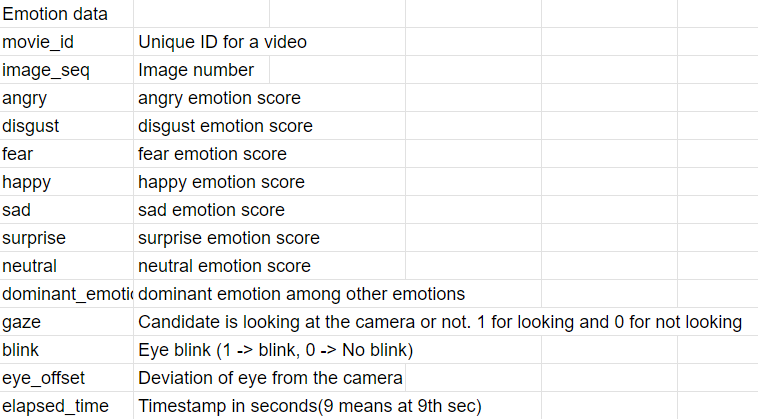

In [47]:
gaze_df[1].head(3)

,movie_id,image_seq,gaze,blink,eye_offset
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,1,1,0,6.2253
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,2,1,0,22.7274
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,3,1,0,2.5704


In [48]:
emotion_df[1].head(3)

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,0,4.31735,0.000594,2.87979,1.65035,2.77998,0.600814,87.77110,neutral
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,1,53.22530,2.981640,12.73680,1.52347,1.05132,27.216800,1.26462,angry
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,2,8.79651,0.029468,2.96816,16.83150,39.88460,0.279335,31.21050,sad


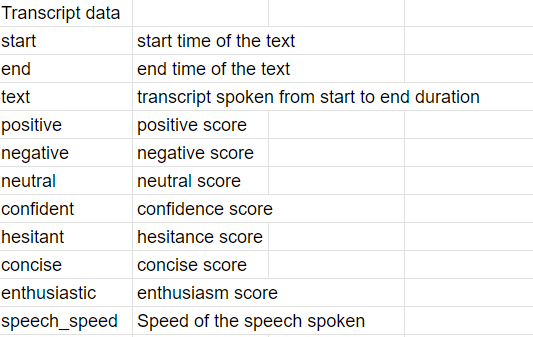

In [50]:
transcript_df[1].head(1)

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.0,5.56,"Hello, I am Jeffrey Shepherd and I am current...","[50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...",0.0,-0.447179,1.651235,0.63588,0.580265,0.152281,0.267454,0.846701,0.845698,0.635805,0.647783,2.517986


In [51]:
transcript[1]

' Hello, I am Jeffrey Shepherd and I am currently pursuing postgraduate and management from  IIM Coikode. I have completed my B.Tech in Biotechnology from Heritage Institute of  Technology Kolkata, followed by my M.Tech from IIT Kharagpur. I come with an experience  of three years in the regulatory affairs domain of the pharmaceutical industry and I worked  as a medical writer in Ciro Klein Farm, Mumbai and have specialized in drug safety and risk  management. What sets me apart is the expertise I bring in with my three years of experience  and an added two years of postgraduation. Along with this, I add another dimension to  the discussion with my background in biotechnology. An added advantage is my ability to pay attention  to detail, which is well testamented in my research work and patents, publication and  the best research award which my work at IIT Kharagpur has received. After my 12th, I developed  a keen interest in baking and over time this has transitioned from a mere hobby

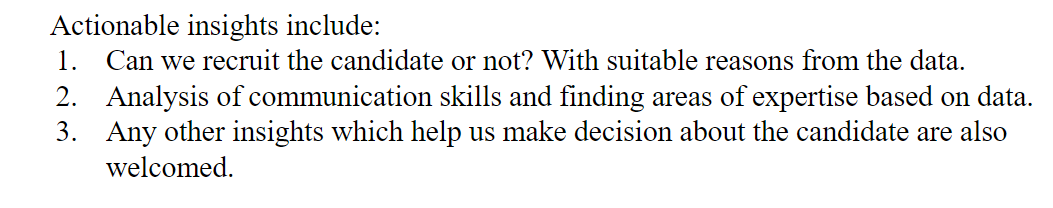

### Plotting emotion trends throughout the frames

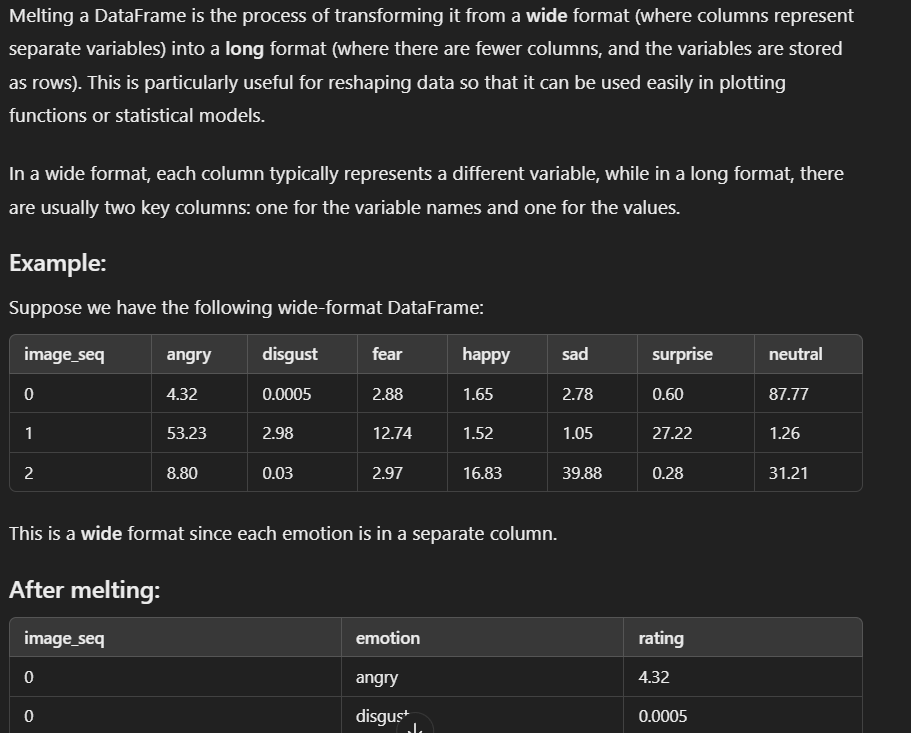

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#before plotting i will melt the dataset 


# Assuming your dataframe (df) is already created
# Melt the dataframe for easier plotting with seaborn
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']  # Only emotion-related columns
df=pd.DataFrame()

for emotion in emotion_columns: 
     df_melted = emotion_df.melt(id_vars='image_seq', value_vars=emotion, var_name='emotion', value_name='rating')
     df=pd.concat([df_melted,df],axis=0)

df


,image_seq,emotion,rating
0,0,neutral,87.77110
1,1,neutral,1.26462
2,2,neutral,31.21050
3,3,neutral,63.54370
4,4,neutral,25.24940
...,...,...,...
82,90,angry,1.57152
83,91,angry,2.27476
84,92,angry,4.32456
85,93,angry,11.03230


In [15]:
df_melted=df.copy()

# Assuming df_melted is already created with the melted structure
# Use plotly.express for the line plot

fig = px.line(
    df_melted, 
    x='image_seq', 
    y='rating', 
    color='emotion', 
    title='Emotion Ratings by Image Sequence'
)

# Customize the layout
fig.update_layout(
    width=1500,  # Adjust the width
    height=500,  # Adjust the height
    legend_title_text='Emotion',
    legend=dict(
        x=1.05,  # Move the legend outside
        y=1,
        traceorder="normal",
        bordercolor="Black",
        borderwidth=1
    ),
    xaxis_title='Image Sequence',
    yaxis_title='Emotion Rating',
    title={
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the plot
fig.show()

### The above plot shows emotion changes throughout the video

### For prompt question answering using PandasAI built upon OPENAI for Q/A on Pandas dataframe

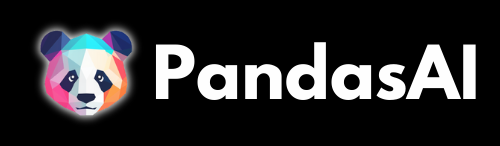

#### Creating agents to interact with the dataset

In [53]:
import os
from pandasai import SmartDataframe
from pandasai import Agent
os.environ["PANDASAI_API_KEY"] = "$2a$10$lCzjlaBEvFTLMzM73tSq0e4/1yfZ0BLtjbIRsFbRpj7OYw5VHs/Ia"
## converting all the dataframes from pandas df to pandasai smartdataframe 

candidate_id=1
#for candidate 1 initially
gaze_agent=Agent(gaze_df[candidate_id])
emotion_agent=Agent(emotion_df[candidate_id])
transcript_agent=Agent(transcript_df[candidate_id])


In [30]:
gaze_agent.chat("what is the average offset of the eye?")

15.8013625

## Now, we will begin with understanding the Communication skills of the Candidate

Communication skills depend majorly on (subset of the dataset taken):
- Confidence Score (from transcript_df)
- Speech Speed (it should be optimal not too fast or slow)
- Concise (The speech should be effective and concise)
- Hesistancy (Person should be less hesistant if they are stating correct fact, hesistancy can be checked if he/she is lying or boosting)
- Dominant reaction (Top 2 reactions from emotion_df must be analysed)
- Blink (blink rate should be less, more blinking is a distractive communication)
- Eye_offset (should be almost constant without much deviation throught conversation)
- Analysing all from the transcrip.txt and checking scores


In [36]:
def get_lineplot(df,x_var,y_var,score):

    #plotting confidence trend in the dataset
    fig = px.line(
        df, 
        x=x_var, 
        y=y_var, 
        title=f'{score} Ratings by Image Sequence'
    )

    # Customize the layout
    fig.update_layout(
        width=1500,  # Adjust the width
        height=500,  # Adjust the height
        xaxis_title=x_var,
        yaxis_title=y_var,
        title={
            'x': 0.5,  # Center the title
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )

    # Show the plot
    fig.show()

In [54]:
transcript_df[1].head(1)

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.0,5.56,"Hello, I am Jeffrey Shepherd and I am current...","[50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...",0.0,-0.447179,1.651235,0.63588,0.580265,0.152281,0.267454,0.846701,0.845698,0.635805,0.647783,2.517986


**Confidence Score Average:**

0.7338 means the average confidence score is about 73.38%. This indicates a fairly high level of confidence in whatever model, classifier, or prediction process you're using.
Generally, a confidence score above 0.7 suggests that the candidate is performing well and making predictions with reasonable certainty.

**Confidence Score Variance:**

0.0434 represents the variance in confidence scores.
A low variance (like 0.0434) indicates that the confidence scores are relatively consistent. This means the model is not fluctuating wildly in how confident it is in its predictions, which is a good sign of stability.

In [63]:
#confidence score for all the candidates
candidates_confidence_scores={} #dictionary contains list of avg score of confidence and variance of confidence score

for idx in range(1, candidates+1):

    confidence_scores=transcript_df[idx]['confident']
    #get_lineplot(transcript_df[idx],'id','confident','Confidence_Score')
    avg_confidence_score=confidence_scores.mean()
    print(f"Confidence Score average for candidate {idx} is: ", avg_confidence_score)
    #the confidence variablity should be less 
    var_confidence_score=confidence_scores.var()
    print(f"Confidence Score Variance for candidate {idx} is: ", var_confidence_score)
   
    w1=0.8
    w2=0.2
    std_confidence_score=var_confidence_score**0.5

    combined_conf_score=w1*avg_confidence_score-w2*(std_confidence_score/avg_confidence_score) #confidence variability is bad thing so subtracting this
    print(f"Combined Confidence Score for candidate {idx} is: ", combined_conf_score)
    print("------------------------------------------------------------------------------")

    candidates_confidence_scores[idx]=[float(avg_confidence_score),float(var_confidence_score),float(combined_conf_score) ]


Confidence Score average for candidate 1 is:  0.7338280114862654
Confidence Score Variance for candidate 1 is:  0.043401239027473865
Combined Confidence Score for candidate 1 is:  0.5302835353823476
------------------------------------------------------------------------------
Confidence Score average for candidate 2 is:  0.6848793406235544
Confidence Score Variance for candidate 2 is:  0.05745307057078798
Combined Confidence Score for candidate 2 is:  0.4779075805659504
------------------------------------------------------------------------------
Confidence Score average for candidate 3 is:  0.5735661341584221
Confidence Score Variance for candidate 3 is:  0.1034894934445723
Combined Confidence Score for candidate 3 is:  0.3466782825546244
------------------------------------------------------------------------------
Confidence Score average for candidate 4 is:  0.6217401878614175
Confidence Score Variance for candidate 4 is:  0.05826275515171767
Combined Confidence Score for candida

### Calculating a combined average score and variance score of confidence to get a better metric--- It is important for an effective communication that a person should be confident throughout

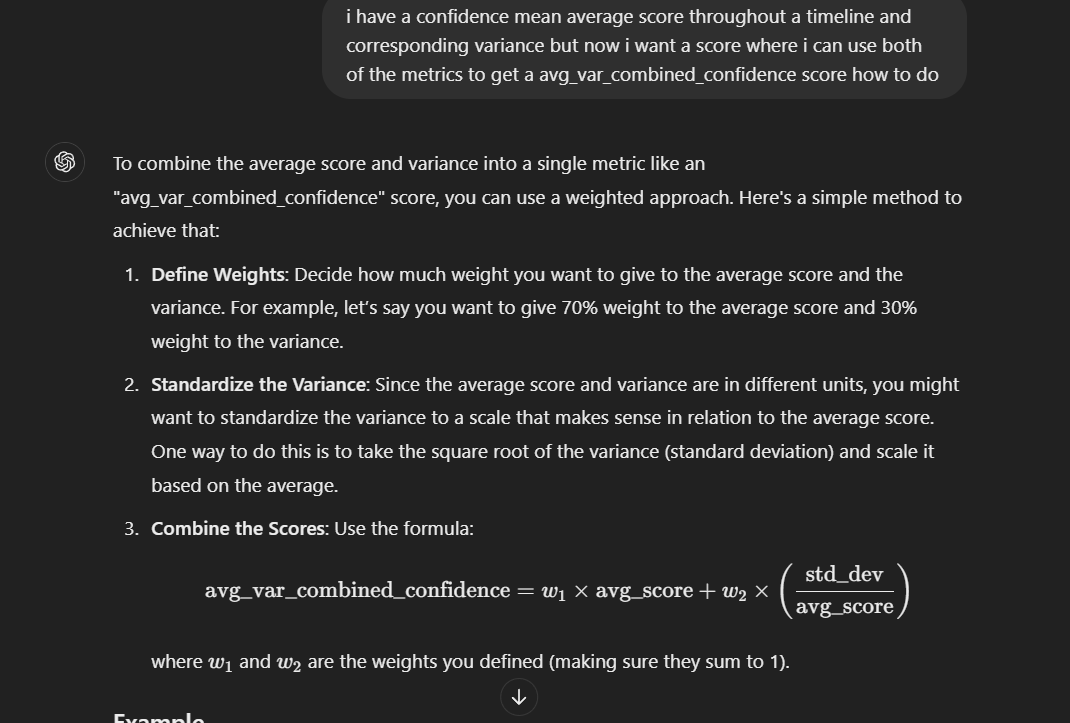

In [67]:
candidates_confidence_scores

{1: [0.7338280114862654, 0.043401239027473865, 0.5302835353823476],
 2: [0.6848793406235544, 0.05745307057078798, 0.4779075805659504],
 3: [0.5735661341584221, 0.1034894934445723, 0.3466782825546244],
 4: [0.6217401878614175, 0.05826275515171767, 0.4197466013787646],
 5: [0.5900939799406949, 0.06863763399720595, 0.3832798870121081],
 6: [0.6797547514239947, 0.043257176516708414, 0.4826100849309777],
 7: [0.7037138847204355, 0.021656812181047775, 0.5211465709002678],
 8: [0.5550108067691326, 0.07048542059337361, 0.34833811011096555],
 9: [0.5918420598738723, 0.06804879981135238, 0.38532119423628686],
 10: [0.6198522983228459, 0.0637664710914052, 0.41440428677790403]}

### Candidates sorted in decreasing order of combined confidence score

In [70]:
comb_conf_list=[]
for i in candidates_confidence_scores:
    comb_conf=candidates_confidence_scores[i][2]
    comb_conf_list.append([i,comb_conf])

#sorting list reverse order
sorted_comb_conf=sorted(comb_conf_list,key=lambda x :x[1],reverse=True)
sorted_comb_conf

[[1, 0.5302835353823476],
 [7, 0.5211465709002678],
 [6, 0.4826100849309777],
 [2, 0.4779075805659504],
 [4, 0.4197466013787646],
 [10, 0.41440428677790403],
 [9, 0.38532119423628686],
 [5, 0.3832798870121081],
 [8, 0.34833811011096555],
 [3, 0.3466782825546244]]

### So as we can see, the candidate 1 has the most combined confidence score with 5,8,3 performing least

## Now, moving on to Analyse Communication Skills Part2. The Speech Speed

from the entire dataset understanding the average speed of human, since i shouldn't be taking assumption here. We will compare speech speed with the avg values and metrics

In [88]:
candidates=10
candidates_speed_scores={}

for idx in range(1,candidates+1):
    speech_speed=transcript_df[idx]['speech_speed']
    #get_lineplot(transcript_df[idx],'id','confident','Confidence_Score')
    avg_speech_speed=speech_speed.mean()
    print(f"Speech Speed average for candidate {idx} is: ", avg_speech_speed)
    #the confidence variablity should be less 
    std_speech_speed=speech_speed.std()
    print(f"Speech Speed Std Dev for candidate {idx} is: ", std_speech_speed)
   
    w1=0.8
    w2=0.2

    combined_speech_score=w1*avg_speech_speed-w2*std_speech_speed #confidence variability is bad thing so subtracting this
    print(f"Combined Speech Score for candidate {idx} is: ", combined_speech_score)
    print("------------------------------------------------------------------------------")

    candidates_speed_scores[idx]=[float(avg_speech_speed),float(std_speech_speed),float(combined_speech_score) ]

Speech Speed average for candidate 1 is:  3.1137708427658684
Speech Speed Std Dev for candidate 1 is:  0.5999580884634697
Combined Speech Score for candidate 1 is:  2.3710250565200006
------------------------------------------------------------------------------
Speech Speed average for candidate 2 is:  3.269092112382821
Speech Speed Std Dev for candidate 2 is:  0.4401664682614567
Combined Speech Score for candidate 2 is:  2.5272403962539656
------------------------------------------------------------------------------
Speech Speed average for candidate 3 is:  3.385636473178966
Speech Speed Std Dev for candidate 3 is:  0.8679942536421758
Combined Speech Score for candidate 3 is:  2.534910327814738
------------------------------------------------------------------------------
Speech Speed average for candidate 4 is:  2.775454072985372
Speech Speed Std Dev for candidate 4 is:  0.3858793972099495
Combined Speech Score for candidate 4 is:  2.143187378946308
--------------------------------

In [89]:
candidates_speed_scores

{1: [3.1137708427658684, 0.5999580884634697, 2.3710250565200006],
 2: [3.269092112382821, 0.4401664682614567, 2.5272403962539656],
 3: [3.385636473178966, 0.8679942536421758, 2.534910327814738],
 4: [2.775454072985372, 0.3858793972099495, 2.143187378946308],
 5: [2.8173408196402616, 0.7056040291468798, 2.1127518498828333],
 6: [2.583163463330654, 0.5817276735484497, 1.9501852359548335],
 7: [2.2848971482729263, 0.46923618029471514, 1.734070482559398],
 8: [2.9029526215428083, 0.6384009582473127, 2.194681905584784],
 9: [3.3299382716049384, 0.6348206490937224, 2.5369864874652066],
 10: [3.2485176794320747, 0.5392709545938913, 2.4909599526268815]}

### Candidates sorted in decreasing order of combined Speech score

In [90]:
comb_speech_list=[]
for i in candidates_speed_scores:
    comb_speech=candidates_speed_scores[i][2]
    comb_speech_list.append([i,comb_speech])

#sorting list reverse order
sorted_comb_speech=sorted(comb_speech_list,key=lambda x :x[1],reverse=True)
sorted_comb_speech

[[9, 2.5369864874652066],
 [3, 2.534910327814738],
 [2, 2.5272403962539656],
 [10, 2.4909599526268815],
 [1, 2.3710250565200006],
 [8, 2.194681905584784],
 [4, 2.143187378946308],
 [5, 2.1127518498828333],
 [6, 1.9501852359548335],
 [7, 1.734070482559398]]

### To actually compare and see if a candidate's speech speed is more than average speed and avg std_dev

In [91]:
sum_std_speech_speed=0
sum_avg_speech_speed=0
for key in candidates_speed_scores:
    candidate_avg_speech=candidates_speed_scores[key][0]
    candidate_std_speech=candidates_speed_scores[key][1]
    sum_avg_speech_speed+=candidate_avg_speech
    sum_std_speech_speed+=candidate_std_speech

overall_avg_speech_speed=sum_avg_speech_speed/candidates
overall_std_speech_speed=sum_std_speech_speed/candidates
print("overall avg speech speed of all canbdidates is:", overall_avg_speech_speed)
print("overall Avg of STD Dev speech speed of all canbdidates is:", overall_std_speech_speed)

overall avg speech speed of all canbdidates is: 2.971076350513669
overall Avg of STD Dev speech speed of all canbdidates is: 0.5863058652502022


### Any candidate either speaking too fast or too slow would be a bad communicater, so need to rank best communicaters in terms of speed

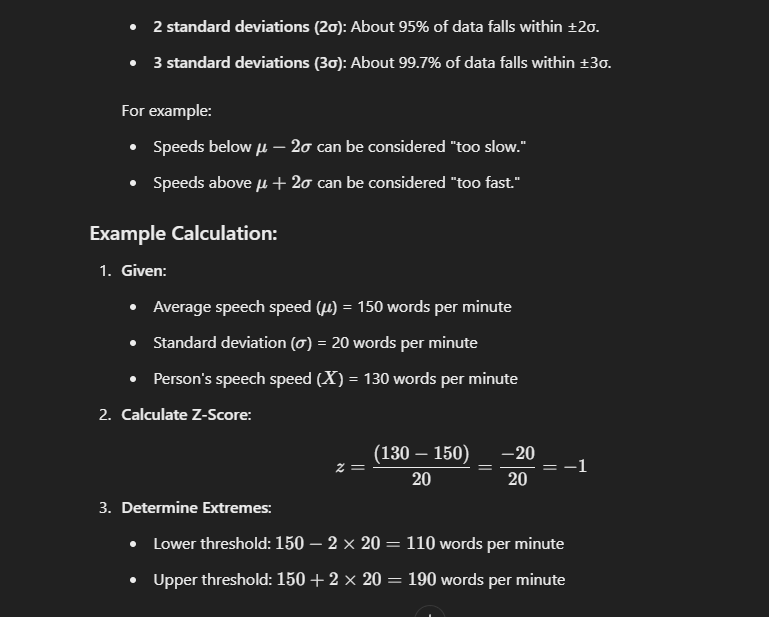

In [92]:
speech_speed_upper_limit=overall_avg_speech_speed+1.0*overall_std_speech_speed
speech_speed_lower_limit=overall_avg_speech_speed-1.0*overall_std_speech_speed

for key in candidates_speed_scores:

    candidate_avg_speech=candidates_speed_scores[key][0]
    if candidate_avg_speech>speech_speed_upper_limit:
        print(f"Candidate {key} speeking too fast")
    elif candidate_avg_speech<speech_speed_lower_limit:
        print(f"Candidate {key} speeking too slow")

Candidate 7 speeking too slow


### Now that we have seen the sorted combined scores of Candidate speech and also understood which candidate speaks too slow i.e Candidate 7

## Communication Analysis- Part 3 Concise comm---> a good communicater must be concise in what he/she speaks and with confidence

In [112]:
def get_sorted_scores(candidates_scores):

    ''' 
    This function sorts the candidate scores
    '''

    comb_list=[]
    for i in candidates_scores:
        comb_score=candidates_scores[i][2]
        comb_list.append([i,comb_score])

    #sorting list reverse order
    sorted_comb_score=sorted(comb_list,key=lambda x :x[1],reverse=True)
    return sorted_comb_score

def get_scores(df,score_type,candidates=10):

    candidates_scores={}

    for idx in range(1,candidates+1):
        val=df[idx][score_type]
        #get_lineplot(df[idx],'id','confident','Confidence_Score')
        avg_score=val.mean()
        #print(f"{score_type} average for candidate {idx} is: ", avg_score)
        #the confidence variablity should be less 
        std_score=val.std()
        #print(f"{score_type} Std Dev for candidate {idx} is: ", std_score)
    
        w1=0.8
        w2=0.2

        combined_score=w1*avg_score-w2*std_score #score avg must be high to show consistent communication and variability must be a bit low
        #print(f"Combined Speech Score for candidate {idx} is: ", combined_speech_score)
        #print("------------------------------------------------------------------------------")

        candidates_scores[idx]=[score_type,float(avg_speech_speed),float(std_score),float(combined_score)]
    
    
    candidates_scores=get_sorted_scores(candidates_scores)
    return candidates_scores

candidates_concise_scores=get_scores(transcript_df,score_type="concise")
candidates_hesistancy_scores=get_scores(transcript_df,score_type="hesitant") #should be moderate, shows well strcutred and thought of communication
#candidates_dominant_emotion=get_scores(emotion_df,score_type="dominant emotion")
candidates_blink_rate=get_scores(gaze_df,score_type="blink") #should not blink too much, be moderate
candidates_eye_offset=get_scores(gaze_df,score_type="eye_offset") #high eye offset from average indicates that the person might be reading introduction and might not be confident (it maybe will be related to low confidence score, can check)
candidates_gaze_score=get_scores(gaze_df,score_type="gaze") 

### Sorting all the candidates with higher combined scores

In [117]:
candidates_concise_scores
concise_score_df=pd.DataFrame(data=candidates_concise_scores,columns=['Candidate','concise_score'])
concise_score_df

,Candidate,concise_score
0,1,0.272635
1,9,0.262527
2,2,0.246994
3,10,0.239241
4,5,0.233565
5,7,0.233381
6,3,0.232922
7,6,0.211848
8,8,0.209769
9,4,0.172476


In [116]:
candidates_hesistancy_scores
hesistant_score_df=pd.DataFrame(data=candidates_hesistancy_scores,columns=['Candidate','hesistant_score'])
hesistant_score_df

,Candidate,hesistant_score
0,9,0.354912
1,2,0.325049
2,7,0.279431
3,8,0.276555
4,1,0.260785
5,5,0.253343
6,10,0.236410
7,3,0.234894
8,6,0.229847
9,4,0.206873


In [106]:
#candidates_dominant_emotion=get_scores(emotion_df,score_type="dominant emotion")

In [115]:
candidates_blink_rate
blink_rate_df=pd.DataFrame(data=candidates_blink_rate,columns=['Candidate','blink_rate'])
blink_rate_df

,Candidate,blink_rate
0,5,0.500000
1,7,0.415549
2,4,0.410891
3,10,0.374766
4,3,0.256432
5,2,0.210649
6,8,0.177642
7,9,0.151599
8,1,0.000000
9,6,0.000000


In [114]:
candidates_eye_offset
eyeoffset_score_df=pd.DataFrame(data=candidates_eye_offset,columns=['Candidate','Eyes_Offset_Score'])
eyeoffset_score_df

,Candidate,Eyes_Offset_Score
0,7,25.453533
1,4,20.419822
2,3,18.909401
3,10,17.923358
4,1,17.858517
5,2,15.619435
6,8,11.373373
7,9,9.477504
8,5,5.849439
9,6,0.322101


In [113]:
candidates_gaze_score
gaze_score_df=pd.DataFrame(data=candidates_gaze_score,columns=['Candidate','Gaze_Score'])
gaze_score_df

,Candidate,Gaze_Score
0,3,0.500000
1,2,0.490759
2,1,0.486897
3,10,0.444694
4,7,0.415549
5,4,0.410891
6,8,0.226773
7,9,0.184561
8,5,0.000000
9,6,0.000000


## We have different aspects of communication scores sorted in descending order. Let us now visualise them to understand more

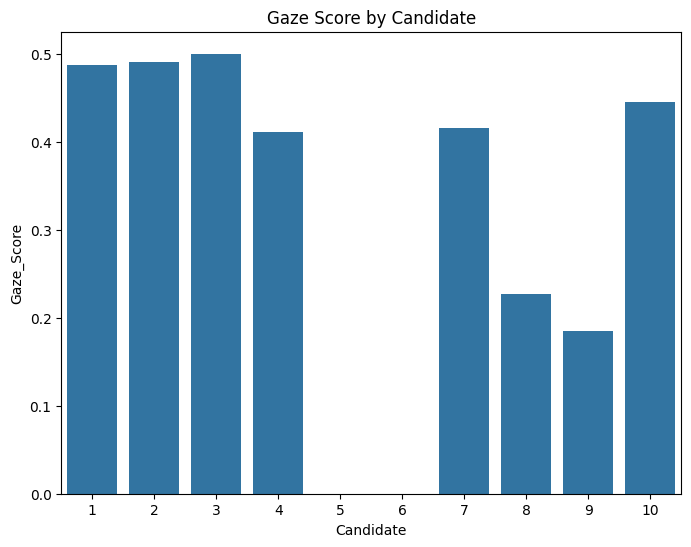

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Candidate', y='Gaze_Score', data=gaze_score_df)
plt.title('Gaze Score by Candidate')
plt.show()

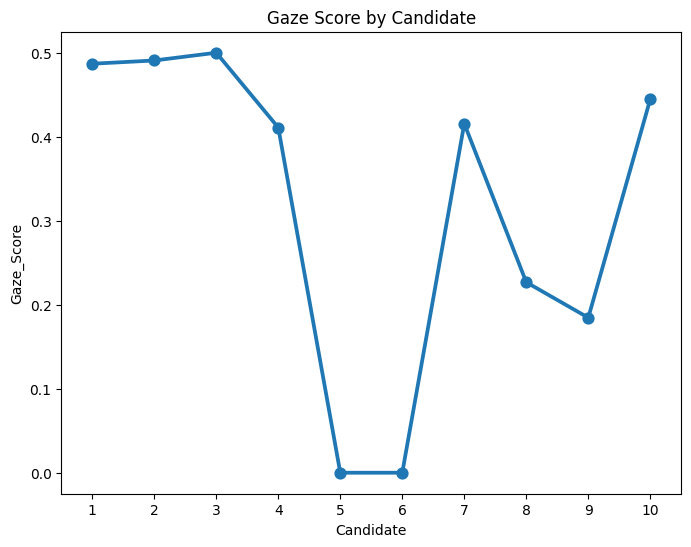

In [119]:
# Point plot
plt.figure(figsize=(8, 6))
sns.pointplot(x='Candidate', y='Gaze_Score', data=gaze_score_df, markers='o')
plt.title('Gaze Score by Candidate')
plt.show()
